In [2]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Check the first few rows of the dataset
print(df)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [3]:
# Checking for missing values
print(df.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
# Dropping the 'CustomerID' column
df = df.drop(['CustomerID'], axis=1)


In [5]:
# Encoding the 'Gender' column
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [6]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [9]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Convert back to DataFrame for easier handling
df_scaled = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income', 'Spending Score'])
print(df_scaled)


          Age  Annual Income  Spending Score
0   -1.424569      -1.738999       -0.434801
1   -1.281035      -1.738999        1.195704
2   -1.352802      -1.700830       -1.715913
3   -1.137502      -1.700830        1.040418
4   -0.563369      -1.662660       -0.395980
..        ...            ...             ...
195 -0.276302       2.268791        1.118061
196  0.441365       2.497807       -0.861839
197 -0.491602       2.497807        0.923953
198 -0.491602       2.917671       -1.250054
199 -0.635135       2.917671        1.273347

[200 rows x 3 columns]


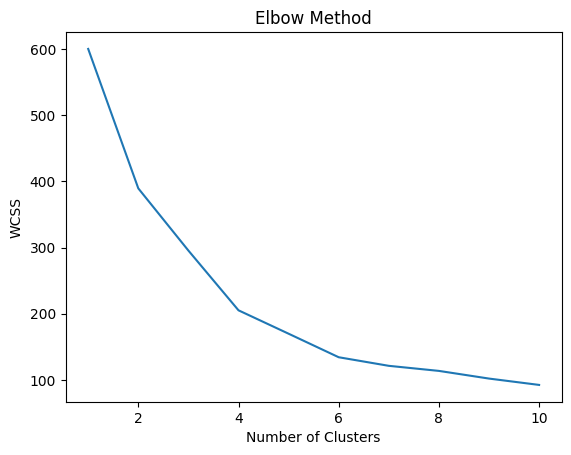

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Append the WCSS for each k

# Plotting the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [12]:
# Applying KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans
print(df.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0   19                  15                      39        2
1       0   21                  15                      81        2
2       1   20                  16                       6        3
3       1   23                  16                      77        2
4       1   31                  17                      40        2


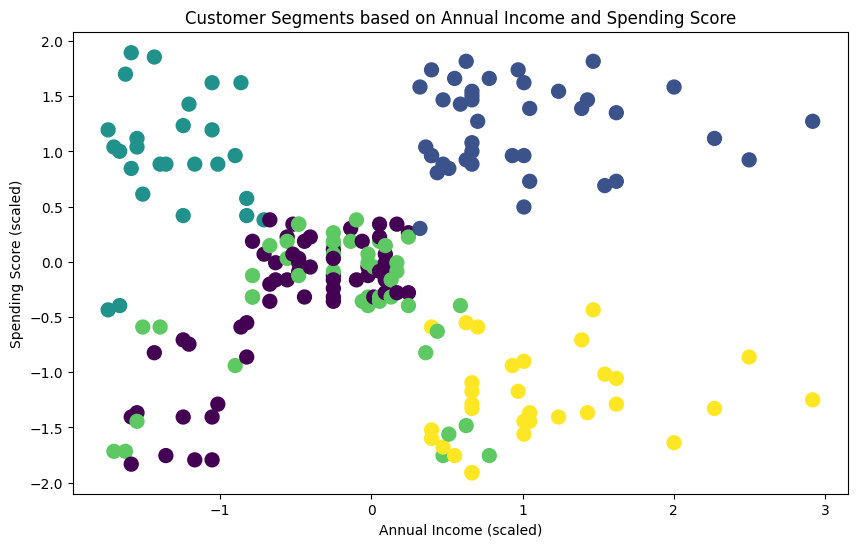

In [13]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled['Annual Income'], df_scaled['Spending Score'], c=y_kmeans, cmap='viridis', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()


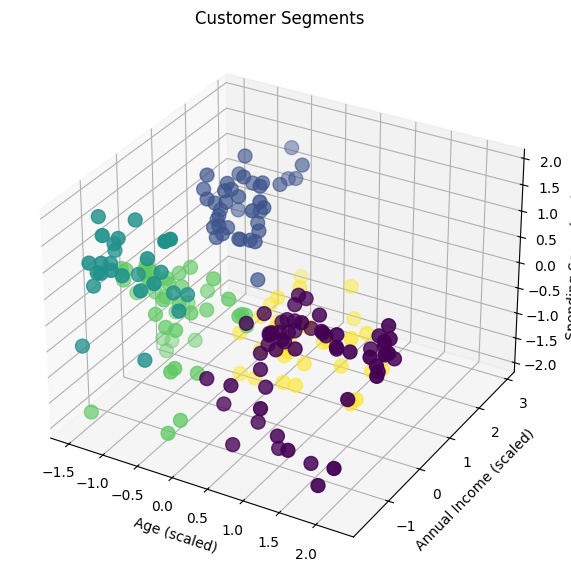

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_scaled['Age'], df_scaled['Annual Income'], df_scaled['Spending Score'],
           c=y_kmeans, cmap='viridis', s=100)
ax.set_title('Customer Segments')
ax.set_xlabel('Age (scaled)')
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score (scaled)')
plt.show()


In [15]:
# Grouping the data by clusters to analyze each segment
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)


           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.568966  55.275862           47.620690               41.706897
1        0.550000  32.875000           86.100000               81.525000
2        0.576923  25.769231           26.115385               74.846154
3        0.600000  26.733333           54.311111               40.911111
4        0.483871  44.387097           89.774194               18.483871


From the cluster analysis, we can interpret the customer segments based on their average values for Gender, Age, Annual Income, and Spending Score.

Cluster 0:
Gender: 56.9% female (since 0.57 ≈ female).
Age: 55.3 years on average.
Annual Income: $47.6k.
Spending Score: 41.7.
Profile: Older customers with mid-range income and moderate spending behavior. These customers may be price-conscious or selective in their purchases.

Cluster 1:
Gender: 55% female.
Age: 32.9 years on average.
Annual Income: $86.1k.
Spending Score: 81.5.
Profile: Young, high-income customers who spend a lot. They likely belong to the premium customer group, making frequent purchases and potentially seeking higher-end products.

Cluster 2:
Gender: 57.7% female.
Age: 25.8 years on average.
Annual Income: $26.1k.
Spending Score: 74.8.
Profile: Young customers with low income but high spending scores. This group might be more impulsive, looking for deals or discounts but still willing to spend on trendy or affordable products.

Cluster 3:
Gender: 60% female.
Age: 26.7 years on average.
Annual Income: $54.3k.
Spending Score: 40.9.
Profile: Young customers with moderate income and low spending scores. They might be cautious with their money, making fewer purchases but still having decent earning potential.

Cluster 4:
Gender: 48.4% female (more balanced gender split).
Age: 44.4 years on average.
Annual Income: $89.8k.
Spending Score: 18.5.
Profile: Older, high-income customers with low spending scores. These could be customers who prefer saving or only spend when necessary. They might be more focused on investments or big purchases, rather than frequent shopping.

Business Insights:
Cluster 0 (Older, moderate-income) might respond well to products catering to older age groups, with promotions that emphasize value.
Cluster 1 (High-income, high-spending) could be targeted with luxury or premium products.
Cluster 2 (Young, low-income, high-spending) could be attracted with discounts and trendy, affordable products.
Cluster 4 (High-income, low-spending) might be encouraged with personalized offers or investment-focused services.
This segmentation provides a clear roadmap for targeted marketing strategies, helping businesses customize their approach for each customer group.